In [1]:
#! pip install numpy pandas xlrd matplotlib seaborn scipy statsmodels scikit-learn imbalanced-learn ppscore tensorflow minisom lime shap geopy folium

In [2]:
cityname = "Raipur"
dataset_path = f'{cityname}.csv'
method = 'minibatch-k-means-clustering'

In [3]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *

In [4]:
df = pd.read_csv(dataset_path)
df = df.reset_index().rename(columns = {
    "index": "id"
})
df.drop(columns=["ID"], inplace=True)

ptype = []

for i in df['Population']:
    if(0 <= i <= 15000):
        ptype.append("Low")
    elif(15001 <= i <= 30000):
        ptype.append("Mid")
    else:
        ptype.append("High")

df["Population Density"] = ptype
df.head()

,id,Pin Code,Name,Latitude,Longitude,Population,Area (km),Population Density
0,0,492004,Shankar Nagar,21.249373,81.665430,19893,3.56,Mid
1,1,492007,Mowa,21.274871,81.634055,26767,7.93,Mid
2,2,492001,Mahaveer Nagar,21.226893,81.663033,15246,3.97,Mid
3,3,492007,New Shanti Nagar,21.246982,81.647489,5129,0.31,Low
4,4,492101,Nardaha,21.293952,81.739268,6575,14.15,Low


<AxesSubplot:xlabel='Population', ylabel='Count'>

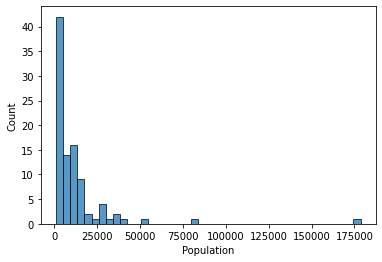

In [5]:
sns.histplot(df, x = "Population")

In [6]:
# Get coordinates to start the map
try:
    location = get_geocoder(address = cityname)
except:
    location = [21.2379469, 81.6336833]
print("[lat, long]:", location)

[lat, long]: [21.2379469, 81.6336833]


In [7]:

map_ = plot_map(df, x = "Latitude", y = "Longitude", start = location, zoom = 11, 
                tiles = "cartodbpositron", popup = "Name", 
                size = "Area (km)", color = "Population Density", lst_colors = ["red","green","orange"], legend = True,
                marker = None)

map_.save(f'final-output/{cityname}-population-{method}.html')
map_

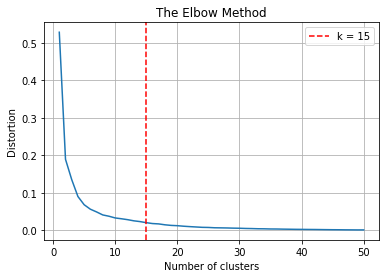

best k =  15


In [8]:
# K-means (euclidean geom, even clusters, must specify k)
k_best = find_best_k(df[["Latitude","Longitude"]], max_k = 50)
print("best k = ", k_best)
k = 25 # According to us

In [9]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters = k, random_state = 1729, batch_size = 1)

In [10]:
model.fit(df[["Latitude","Longitude"]])
model

MiniBatchKMeans(batch_size=1, n_clusters=25, random_state=1729)

In [11]:
coord_clusters = model.cluster_centers_
coord_clusters

array([[21.24513892, 81.5840679 ],
       [21.2005224 , 81.7402792 ],
       [21.22016867, 81.64744746],
       [21.293952  , 81.7392679 ],
       [21.13976885, 81.78720277],
       [21.27451655, 81.62637517],
       [21.1580233 , 81.6559087 ],
       [21.3095552 , 81.5854673 ],
       [21.26152292, 81.67010238],
       [21.2470368 , 81.61823442],
       [21.17517731, 81.77699561],
       [21.2134241 , 81.695205  ],
       [21.3084999 , 81.650322  ],
       [21.198611  , 81.8050776 ],
       [21.314799  , 81.787518  ],
       [21.25527436, 81.64346251],
       [21.23391494, 81.66544256],
       [21.2835212 , 81.6024518 ],
       [21.20736803, 81.63120867],
       [21.2590702 , 81.5556516 ],
       [21.22683367, 81.61827683],
       [21.19902874, 81.65934943],
       [21.26269403, 81.5907327 ],
       [21.3100625 , 81.6136473 ],
       [21.23918054, 81.64130864]])

In [12]:
cluster_vals = model.predict(df[["Latitude","Longitude"]])
cluster_vals

array([ 8,  5, 16, 15,  3,  8,  2,  8,  2, 24, 17,  7, 16, 24,  5,  8, 14,
       24, 24,  9, 15, 19,  5,  0, 16,  1, 21,  6,  0, 24, 22, 18, 22,  9,
       20, 21,  0,  8, 11, 15, 24, 16, 22, 18, 22, 24,  9,  2,  3, 12, 16,
        2,  8,  9, 24, 16, 15, 16, 18, 15, 20, 15, 15,  0,  8, 21, 18, 22,
       22,  9, 23,  2,  8, 11, 24, 12, 20,  8, 20,  2, 13, 10, 13, 10, 10,
       10, 10, 10,  4,  4,  4,  4,  4,  4,  4], dtype=int32)

In [13]:
from haversine import haversine, Unit
cluster_lat, cluster_long = [], []
dist = []
idx = 0

point_lat = df['Latitude'].to_numpy()
point_long = df['Longitude'].to_numpy()

# print(point_lat)
# print(point_long)

for cluster_val in cluster_vals:
    (x, y) = coord_clusters[cluster_val]
    cluster_lat.append(x)
    cluster_long.append(y)
    dist.append(haversine((x, y), (point_lat[idx], point_long[idx])))
    idx += 1

In [14]:
df['Cluster Latitude'] = cluster_lat
df['Cluster Longitude'] = cluster_long
df['Cluster'] = cluster_vals
df['Cluster Distance'] = dist

In [15]:
df.head()

,id,Pin Code,Name,Latitude,Longitude,Population,Area (km),Population Density,Cluster Latitude,Cluster Longitude,Cluster,Cluster Distance
0,0,492004,Shankar Nagar,21.249373,81.665430,19893,3.56,Mid,21.261523,81.670102,8,1.435178
1,1,492007,Mowa,21.274871,81.634055,26767,7.93,Mid,21.274517,81.626375,5,0.796718
2,2,492001,Mahaveer Nagar,21.226893,81.663033,15246,3.97,Mid,21.233915,81.665443,16,0.819756
3,3,492007,New Shanti Nagar,21.246982,81.647489,5129,0.31,Low,21.255274,81.643463,15,1.012086
4,4,492101,Nardaha,21.293952,81.739268,6575,14.15,Low,21.293952,81.739268,3,0.000000


In [16]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    '#ffff00',
    '#00ff11',
    '#0022ff',
    '#d400ff',
    '#ff00b3',
    '#00ffbf',
    '#ff9100',
    '#ffd500',
    '#b3ff00',
    '#ff6a00',
    '#ff5100',
    '#5500ff',
    '#9d00ff',
    '#d000ff'
    'black'
]

In [17]:
cdf = df = df.groupby('Cluster', as_index=False).agg({'Population':'sum', 'Cluster Distance':'sum', 'Area (km)': 'sum'})
cdf[['Latitude', 'Longitude']] = coord_clusters
cdf['Station Name'] = [f"{i + 1}" for i in range(k)]

In [18]:
cdf

,Cluster,Population,Cluster Distance,Area (km),Latitude,Longitude,Station Name
0,0,108833,4.781169,26.74,21.245139,81.584068,1
1,1,6024,0.000000,2.95,21.200522,81.740279,2
2,2,83442,3.514680,8.45,21.220169,81.647447,3
3,3,10785,3.110471,17.98,21.293952,81.739268,4
4,4,40524,10.422050,19.47,21.139769,81.787203,5
5,5,51413,1.869622,11.48,21.274517,81.626375,6
6,6,2471,0.000000,3.73,21.158023,81.655909,7
7,7,83394,0.000000,16.22,21.309555,81.585467,8
8,8,60657,10.702879,18.91,21.261523,81.670102,9
9,9,40704,5.184693,5.28,21.247037,81.618234,10


In [19]:
idx = 0
for (x, y) in model.cluster_centers_:
    # With-in-Sum-of-Squares (WSS): WSS is the total distance of data points from their respective cluster centroids.
    html=f"""
        <link href='http://fonts.googleapis.com/css?family=Roboto' rel='stylesheet' type='text/css'>
        <div style = "font-family: 'Roboto', sans-serif;">
            <h4> Cluster {idx + 1}</h4>
            <p>Details: </p>
            <ul>
                <li>Population: {cdf.iloc[idx, 1]}</li>
                <li>WSS: {cdf.iloc[idx, 2]:.3f} km</li>
                <li>Area: {cdf.iloc[idx, 3]:.3f} km^2</li>
            </ul>
            </p>
        <div>
        """
    iframe = folium.IFrame(html=html, width = 200, height = 200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location = [x, y],
        popup = popup,
        icon = folium.Icon(
            color = colors[idx]
        )
    ).add_to(map_)
    idx += 1

map_.save(f'final-output/{cityname}-clusters-population-{method}.html')
map_

In [20]:
from mst_utils import *
mst_map = gen_mst(cityname, cdf)
mst_map.save(f'final-output/{cityname}-final-mst-without-checkmark-{method}.html')
mst_map

total length of metro line = 81.82844502246435 km


In [21]:
idx = 0
for (x, y) in model.cluster_centers_:
    # With-in-Sum-of-Squares (WSS): WSS is the total distance of data points from their respective cluster centroids.
    html=f"""
        <link href='http://fonts.googleapis.com/css?family=Roboto' rel='stylesheet' type='text/css'>
        <div style = "font-family: 'Roboto', sans-serif;">
            <h4> Station {idx + 1}</h4>
            <p>Details: </p>
            <ul>
                <li>Population: {cdf.iloc[idx, 1]}</li>
                <li>WSS: {cdf.iloc[idx, 2]:.3f} km</li>
                <li>Area: {cdf.iloc[idx, 3]:.3f} km^2</li>
            </ul>
        <div>
        """
    iframe = folium.IFrame(html=html, width = 200, height = 200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location = [x, y],
        popup = popup,
        icon = folium.Icon(
            color = colors[idx]
        )
    ).add_to(mst_map)
    idx += 1

In [22]:
mst_map

In [23]:
mst_map.save(f'final-output/{cityname}-final-mst-{method}.html')

In [24]:

cdf.to_csv(f'final-output/{cityname}-final-mst-{method}.csv')